# 02 eda - TODO

## Purpose
To be filled during project development

## Steps
1. 
2. 
3. 

In [1]:
# CELL 1: Setup with correct paths
import os
import sys

# Now import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')
from scipy import stats


# Get the project root (one level up from notebooks)
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

print(f"📁 Current directory: {os.getcwd()}")
print(f"📁 Project root: {project_root}")

# Define paths
data_raw_path = os.path.join(project_root, 'data', 'raw')
data_processed_path = os.path.join(project_root, 'data', 'processed')
figures_path = os.path.join(project_root, 'figures')

print(f"📁 Data raw path: {data_raw_path}")
print(f"📁 Data processed path: {data_processed_path}")
print(f"📁 Figures path: {figures_path}")



print("\n📊 Exploratory Data Analysis - EUR/USD")
print("="*50)


📁 Current directory: /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/notebooks
📁 Project root: /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone
📁 Data raw path: /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/data/raw
📁 Data processed path: /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/data/processed
📁 Figures path: /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/figures

📊 Exploratory Data Analysis - EUR/USD


In [2]:
# CELL 2: Load the raw data
print("\n📂 Loading data...")
raw_data_file = os.path.join(data_raw_path, 'eurusd_raw.csv')

if not os.path.exists(raw_data_file):
    print(f"❌ ERROR: File not found: {raw_data_file}")
    print("Please run 01_data_collection.ipynb first!")
else:
    df = pd.read_csv(raw_data_file, index_col=0, parse_dates=True)
    print(f"✅ Data loaded: {len(df)} rows, {len(df.columns)} columns")
    print(f"📅 Date range: {df.index[0].date()} to {df.index[-1].date()}")



📂 Loading data...
✅ Data loaded: 779 rows, 5 columns
📅 Date range: 2022-12-12 to 2025-12-09


In [3]:
# CELL 3: Load metadata
print("\n📋 Loading metadata...")
metadata_file = os.path.join(data_raw_path, 'metadata.json')
if os.path.exists(metadata_file):
    with open(metadata_file, 'r') as f:
        metadata = json.load(f)
    print("✅ Metadata loaded")
    print(f"Ticker: {metadata['ticker']}")
    print(f"Data points: {metadata['data_points']}")
    print(f"Download date: {metadata['download_date']}")
else:
    print("⚠️ Metadata file not found")



📋 Loading metadata...
✅ Metadata loaded
Ticker: EURUSD=X
Data points: 779
Download date: 2025-12-09 14:17:14


In [4]:
# CELL 4: Data overview
print("\n🔍 DATA OVERVIEW")
print("-"*40)

print("First 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())

print("\nData types:")
print(df.dtypes)

print("\nMissing values per column:")
missing = df.isnull().sum()
for col in df.columns:
    missing_count = missing[col]
    if missing_count > 0:
        print(f"  {col}: {missing_count} missing ({missing_count/len(df)*100:.1f}%)")
    else:
        print(f"  {col}: No missing values")


🔍 DATA OVERVIEW
----------------------------------------
First 5 rows:
                open      high       low     close  volume
Date                                                      
2022-12-12  1.052222  1.057921  1.050707  1.052222       0
2022-12-13  1.054174  1.066894  1.052931  1.054174       0
2022-12-14  1.062665  1.066985  1.062011  1.062665       0
2022-12-15  1.067635  1.072559  1.060738  1.067635       0
2022-12-16  1.064056  1.066325  1.059940  1.064056       0

Last 5 rows:
                open      high       low     close  volume
Date                                                      
2025-12-03  1.162899  1.167583  1.162818  1.162791       0
2025-12-04  1.166671  1.168224  1.165365  1.166684       0
2025-12-05  1.164456  1.167147  1.162858  1.164280       0
2025-12-08  1.164117  1.167256  1.161697  1.164022       0
2025-12-09  1.163873  1.165909  1.163738  1.164144       0

Data types:
open      float64
high      float64
low       float64
close     float64
vol

In [5]:
# CELL 5: Basic statistics
print("\n📊 BASIC STATISTICS")
print("-"*40)

print("Closing Price Statistics:")
print(f"Mean:    ${df['close'].mean():.4f}")
print(f"Median:  ${df['close'].median():.4f}")
print(f"Std Dev: ${df['close'].std():.4f}")
print(f"Min:     ${df['close'].min():.4f}")
print(f"Max:     ${df['close'].max():.4f}")
print(f"Range:   ${df['close'].max() - df['close'].min():.4f}")


📊 BASIC STATISTICS
----------------------------------------
Closing Price Statistics:
Mean:    $1.0957
Median:  $1.0873
Std Dev: $0.0376
Min:     $1.0244
Max:     $1.1871
Range:   $0.1627



📈 CREATING VISUALIZATIONS
----------------------------------------


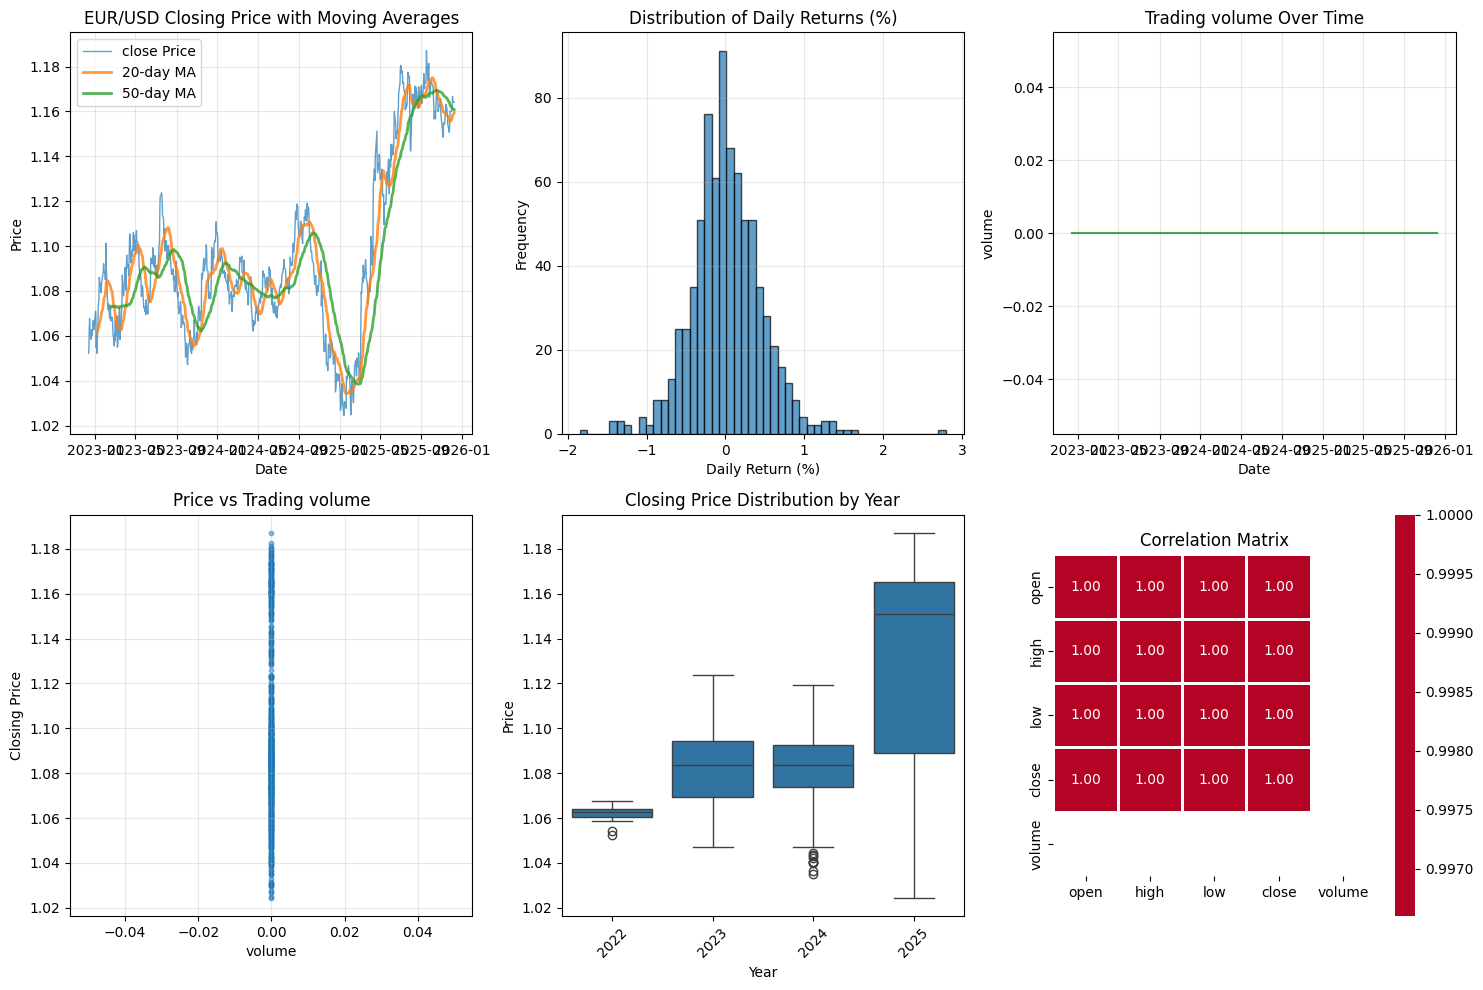

✅ EDA visualizations saved to: /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/figures/eda_analysis.png


In [6]:
# CELL 6: Create visualizations
print("\n📈 CREATING VISUALIZATIONS")
print("-"*40)

plt.figure(figsize=(15, 10))

# Plot 1: Closing price with moving averages
plt.subplot(2, 3, 1)
plt.plot(df.index, df['close'], label='close Price', linewidth=1, alpha=0.7)
plt.plot(df.index, df['close'].rolling(window=20).mean(), 
         label='20-day MA', linewidth=2, alpha=0.8)
plt.plot(df.index, df['close'].rolling(window=50).mean(), 
         label='50-day MA', linewidth=2, alpha=0.8)
plt.title('EUR/USD Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Daily returns
df['Daily_Return'] = df['close'].pct_change() * 100
plt.subplot(2, 3, 2)
plt.hist(df['Daily_Return'].dropna(), bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Daily Returns (%)')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Plot 3: volume over time
plt.subplot(2, 3, 3)
plt.plot(df.index, df['volume'], color='green', alpha=0.7)
plt.title('Trading volume Over Time')
plt.xlabel('Date')
plt.ylabel('volume')
plt.grid(True, alpha=0.3)

# Plot 4: Price vs volume
plt.subplot(2, 3, 4)
plt.scatter(df['volume'], df['close'], alpha=0.5, s=10)
plt.title('Price vs Trading volume')
plt.xlabel('volume')
plt.ylabel('Closing Price')
plt.grid(True, alpha=0.3)

# Plot 5: Box plot by year
df['Year'] = df.index.year
plt.subplot(2, 3, 5)
sns.boxplot(x='Year', y='close', data=df)
plt.title('Closing Price Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=45)

# Plot 6: Correlation heatmap
plt.subplot(2, 3, 6)
corr_matrix = df[['open', 'high', 'low', 'close', 'volume']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', linewidths=1)
plt.title('Correlation Matrix')

plt.tight_layout()
eda_chart_path = os.path.join(figures_path, 'eda_analysis.png')
plt.savefig(eda_chart_path, dpi=100, bbox_inches='tight')
plt.show()

print(f"✅ EDA visualizations saved to: {eda_chart_path}")

In [7]:
# CELL 7: Time series analysis
print("\n🕰️ TIME SERIES ANALYSIS")
print("-"*40)

# Check for trends
x = np.arange(len(df))
y = df['close'].values
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(f"Linear trend slope: {slope:.6f} (positive = upward trend)")
print(f"R-squared of trend: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")

# Seasonal patterns
df['month'] = df.index.month
df['dayofweek'] = df.index.dayofweek  # Monday=0, Sunday=6

print("\nAverage Close by Month:")
monthly_avg = df.groupby('month')['close'].mean()
for month, price in monthly_avg.items():
    month_name = pd.to_datetime(f'2024-{month}-01').strftime('%B')
    print(f"  {month_name:10}: ${price:.4f}")

print("\nAverage Close by Day of Week:")
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg = df.groupby('dayofweek')['close'].mean()
for day, price in daily_avg.items():
    if day < 5:  # Only weekdays for forex
        print(f"  {weekday_names[day]:10}: ${price:.4f}")


🕰️ TIME SERIES ANALYSIS
----------------------------------------
Linear trend slope: 0.000095 (positive = upward trend)
R-squared of trend: 0.3207
P-value: 0.0000

Average Close by Month:
  January   : $1.0686
  February  : $1.0644
  March     : $1.0790
  April     : $1.0951
  May       : $1.0982
  June      : $1.1043
  July      : $1.1201
  August    : $1.1178
  September : $1.1183
  October   : $1.1046
  November  : $1.0990
  December  : $1.0774

Average Close by Day of Week:
  Monday    : $1.0953
  Tuesday   : $1.0961
  Wednesday : $1.0959
  Thursday  : $1.0958
  Friday    : $1.0956


In [8]:
# CELL 8: Save processed data for modeling
print("\n💾 SAVING PROCESSED DATA FOR MODELING")

# Create additional features
df_processed = df.copy()

# # Technical indicators
# df_processed['SMA_20'] = df_processed['close'].rolling(window=20).mean()
# df_processed['SMA_50'] = df_processed['close'].rolling(window=50).mean()
# df_processed['EMA_12'] = df_processed['close'].ewm(span=12).mean()
# df_processed['EMA_26'] = df_processed['close'].ewm(span=26).mean()

# # Price changes
# df_processed['Price_Change_1D'] = df_processed['close'].pct_change(1)
# df_processed['Price_Change_5D'] = df_processed['close'].pct_change(5)
# df_processed['Price_Change_30D'] = df_processed['close'].pct_change(30)

# # Volatility
# df_processed['Volatility_20D'] = df_processed['Price_Change_1D'].rolling(20).std()

# Remove rows with NaN values
initial_rows = len(df_processed)
df_processed = df_processed.dropna()
removed_rows = initial_rows - len(df_processed)

print(f"Removed {removed_rows} rows with missing values")
print(f"Remaining rows: {len(df_processed)}")

# Save processed data
processed_file = os.path.join(data_processed_path, 'eurusd_processed.csv')
df_processed.to_csv(processed_file)
print(f"✅ Processed data saved to: {processed_file}")



💾 SAVING PROCESSED DATA FOR MODELING
Removed 1 rows with missing values
Remaining rows: 778
✅ Processed data saved to: /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/data/processed/eurusd_processed.csv


In [9]:
# CELL 9: Summary
print("\n" + "="*60)
print("📋 EDA SUMMARY")
print("="*60)

print(f"\n1. DATA OVERVIEW:")
print(f"   • Period: {df.index[0].date()} to {df.index[-1].date()}")
print(f"   • Trading days: {len(df)}")
print(f"   • Average price: ${df['close'].mean():.4f}")

print(f"\n2. KEY FINDINGS:")
print(f"   • Daily return volatility: {df['Daily_Return'].std():.4f}%")
print(f"   • Highest correlation: Close with Open ({corr_matrix.loc['close', 'open']:.3f})")
print(f"   • Trend direction: {'Upward' if slope > 0 else 'Downward'}")

print(f"\n3. FILES SAVED:")
print(f"   • {eda_chart_path}")
print(f"   • {processed_file}")

print(f"\n4. NEXT STEPS:")
print("   • Open 03_feature_engineering.ipynb")
print("   • Continue with feature creation")
print("   • Prepare for model training")

print("\n✅ EDA COMPLETE!")


📋 EDA SUMMARY

1. DATA OVERVIEW:
   • Period: 2022-12-12 to 2025-12-09
   • Trading days: 779
   • Average price: $1.0957

2. KEY FINDINGS:
   • Daily return volatility: 0.4538%
   • Highest correlation: Close with Open (1.000)
   • Trend direction: Upward

3. FILES SAVED:
   • /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/figures/eda_analysis.png
   • /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/data/processed/eurusd_processed.csv

4. NEXT STEPS:
   • Open 03_feature_engineering.ipynb
   • Continue with feature creation
   • Prepare for model training

✅ EDA COMPLETE!
